In [1]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
tf.enable_eager_execution()

E:\Ana\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
annual_data_PSTexas = pd.read_pickle("./Datapreprocess/PreprocessedData/annual_data_PSTexas.pickle")
hourly_data_PSTexas_ID = np.load('./Datapreprocess/hourly_data_PSTexas_HouseholdID.npy')
daily_data_PSTexas_data=np.load('./daily_data_PSTexas_data.npy')

In [9]:
#make the annual data match the daily data
annual_data_PSTexas_data=[]
for i in hourly_data_PSTexas_ID:
    annual_data_PSTexas_data.append(annual_data_PSTexas[annual_data_PSTexas['HouseholdID']==i].iloc[:,1:].values)
annual_data_PSTexas_data=np.array(annual_data_PSTexas_data)

In [13]:
nums=daily_data_PSTexas_data.shape[0]

In [14]:
SD_Daily = StandardScaler()
daily_data_PSTexas_SD = SD_Daily.fit(daily_data_PSTexas_data.reshape(nums,-1)).transform(daily_data_PSTexas_data.reshape(nums,-1))

E:\Ana\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
SD_Annualy = StandardScaler()
annual_data_PSTexas_SD = SD_Annualy.fit(annual_data_PSTexas_data.reshape(nums,-1)).transform(annual_data_PSTexas_data.reshape(nums,-1))

from sklearn.externals import joblib
joblib.dump(SD_Annualy,'./Scaler/SD_annual_bf_C_gen')
joblib.dump(SD_Daily,'./Scaler/SD_daily')

In [10]:
def randomV(batch_size,feature_nums):
    return tf.random_normal((batch_size,feature_nums),0.0,0.01,dtype='float64')

def input_fn(df,batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(df)
    dataset= dataset.repeat(10)
    dataset = dataset.shuffle(400)
    dataset = dataset.batch(batch_size)
    return dataset


class C_generator(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.encoder_dense1 = tf.keras.layers.Dense(32)
        self.encoder_bh1 = tf.keras.layers.BatchNormalization()
        self.encoder_dense2 = tf.keras.layers.Dense(64)
        self.encoder_bh2 = tf.keras.layers.BatchNormalization()
        self.encoder_dense3 = tf.keras.layers.Dense(128)
        self.encoder_bh3 = tf.keras.layers.BatchNormalization()
        self.encoder_dense4 = tf.keras.layers.Dense(256)
        self.encoder_bh4 = tf.keras.layers.BatchNormalization()
        self.encoder_dense5 = tf.keras.layers.Dense(512)
        self.encoder_bh5 = tf.keras.layers.BatchNormalization()
        self.encoder_dense6 = tf.keras.layers.Dense(1024)
        self.encoder_bh6 = tf.keras.layers.BatchNormalization()
        self.encoder_dense7 = tf.keras.layers.Dense(2048)
        self.encoder_bh7 = tf.keras.layers.BatchNormalization()
        self.encoder_dense8 = tf.keras.layers.Dense(5475)

    def call(self,x,is_training):
        x=self.encoder_dense1(x)
        x=self.encoder_bh1(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense2(x)
        x=self.encoder_bh2(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense3(x)
        x=self.encoder_bh3(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense4(x)
        x=self.encoder_bh4(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense5(x)
        x=self.encoder_bh5(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense6(x)
        x=self.encoder_bh6(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense7(x)
        x=self.encoder_bh7(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        #x=tf.nn.sigmoid(x)
        #x=tf.nn.tanh(x)
        x=self.encoder_dense8(x)
        return x
    
class C_discriminator(tf.keras.Model):
    def __init__(self):
        super().__init__()

        
        self.dis_dense4 = tf.keras.layers.Dense(2048)
        self.dis_bh4 = tf.keras.layers.BatchNormalization()
        self.dis_dense5 = tf.keras.layers.Dense(1024)
        self.dis_bh5 = tf.keras.layers.BatchNormalization()
        self.dis_dense6 = tf.keras.layers.Dense(512)
        self.dis_bh6 = tf.keras.layers.BatchNormalization()
        self.dis_dense7 = tf.keras.layers.Dense(128) 
        self.dis_bh7 = tf.keras.layers.BatchNormalization()
        self.dis_dense8 = tf.keras.layers.Dense(64) 
        self.dis_bh8 = tf.keras.layers.BatchNormalization()
        self.dis_dense9 = tf.keras.layers.Dense(32) 
        self.dis_bh9 = tf.keras.layers.BatchNormalization()
        self.dis_dense10 = tf.keras.layers.Dense(15) 
        self.dis_bh10 = tf.keras.layers.BatchNormalization()
        self.dis_dense11 = tf.keras.layers.Dense(256) 
        self.dis_bh11 = tf.keras.layers.BatchNormalization()
        self.dis_dense12 = tf.keras.layers.Dense(512) 
        self.dis_bh12 = tf.keras.layers.BatchNormalization()
        self.dis_dense13 = tf.keras.layers.Dense(256) 
        self.dis_bh13 = tf.keras.layers.BatchNormalization()
        self.dis_dense14 = tf.keras.layers.Dense(128) 
        self.dis_bh14 = tf.keras.layers.BatchNormalization()        
        self.dis_dense15 = tf.keras.layers.Dense(32) 
        self.dis_bh15 = tf.keras.layers.BatchNormalization()        
        self.dis_dense16 = tf.keras.layers.Dense(16) 
        self.dis_bh16 = tf.keras.layers.BatchNormalization()  
        self.dis_dense17 = tf.keras.layers.Dense(1) 
    def call(self,x,y,is_training):
        x=self.dis_dense4(x)
        x=self.dis_bh4(x,training=is_training)
        #x= tf.nn.leaky_relu(x)
        x=tf.nn.sigmoid(x)
        x=self.dis_dense5(x)
        x=self.dis_bh5(x,training=is_training)
        #x= tf.nn.leaky_relu(x)
        x=self.dis_dense6(x)
        x=self.dis_bh6(x,training=is_training)
        #x= tf.nn.leaky_relu(x)
        x=self.dis_dense7(x)
        x=self.dis_bh7(x,training=is_training)
       # x= tf.nn.leaky_relu(x)
#''' x=self.dis_dense8(x)
 #       x=self.dis_bh8(x,training=is_training)
  #      x= tf.nn.leaky_relu(x)
   #     x=self.dis_dense9(x)
    #x=self.dis_bh9(x,training=is_training)
     #   x= tf.nn.leaky_relu(x)
      #  x=self.dis_dense10(x)
       # x=self.dis_bh10(x,training=is_training)
        #x= tf.nn.leaky_relu(x)

        x= tf.concat([tf.reshape(tf.to_float(x),[-1,128]),tf.reshape(tf.to_float(y),[-1,15])],1)
        x=self.dis_dense11(x)
        x=self.dis_bh11(x,training=is_training)
        #x= tf.nn.leaky_relu(x)
        x=self.dis_dense12(x)
        x=self.dis_bh12(x,training=is_training)
        #x= tf.nn.leaky_relu(x)        
        x=self.dis_dense13(x)
        x=self.dis_bh13(x,training=is_training)
        #x= tf.nn.leaky_relu(x)
        x=self.dis_dense14(x)
        x=self.dis_bh14(x,training=is_training)
        #x= tf.nn.leaky_relu(x)
        x=self.dis_dense15(x)
        x=self.dis_bh15(x,training=is_training)
        #x= tf.nn.leaky_relu(x)
        x=self.dis_dense16(x)
        x=self.dis_bh16(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_dense17(x)
        
        return x 
    
class C_discriminator_Conv(tf.keras.Model):
    def __init__(self):
        super().__init__()

        self.dis_conv1=tf.keras.layers.Conv2D(32,(31,1))
        self.dis_bh_c1 = tf.keras.layers.BatchNormalization()
        self.dis_conv2=tf.keras.layers.Conv2D(32,(31,1))
        self.dis_bh_c2 = tf.keras.layers.BatchNormalization()
        self.dis_conv3=tf.keras.layers.Conv2D(64,(31,1))
        self.dis_bh_c3 = tf.keras.layers.BatchNormalization()
        self.dis_conv4=tf.keras.layers.Conv2D(64,(31,1))
        self.dis_bh_c4 = tf.keras.layers.BatchNormalization()
        self.dis_conv5=tf.keras.layers.Conv2D(128,(31,1)) 
        self.dis_bh_c5 = tf.keras.layers.BatchNormalization()
        self.dis_conv6=tf.keras.layers.Conv2D(64,(31,1))
        self.dis_bh_c6 = tf.keras.layers.BatchNormalization()
        self.dis_conv7=tf.keras.layers.Conv2D(32,(31,1))
        self.dis_bh_c7 = tf.keras.layers.BatchNormalization()
        self.dis_conv8=tf.keras.layers.Conv2D(32,(31,1))
        self.dis_bh_c8 = tf.keras.layers.BatchNormalization()
        self.dis_conv9=tf.keras.layers.Conv2D(32,(31,1))
        self.dis_bh_c9 = tf.keras.layers.BatchNormalization()
        self.dis_conv10=tf.keras.layers.Conv2D(16,(31,1))
        self.dis_bh_c10 = tf.keras.layers.BatchNormalization()
        self.dis_conv11=tf.keras.layers.Conv2D(8,(31,1)) 
        self.dis_bh_c11 = tf.keras.layers.BatchNormalization()
        self.dis_conv12=tf.keras.layers.Conv2D(4,(31,1)) 
        self.dis_bh_c12 = tf.keras.layers.BatchNormalization()
        self.dis_conv13=tf.keras.layers.Conv2D(1,(5,1))
        self.dis_bh_c13 = tf.keras.layers.BatchNormalization()
        
        
        self.dis_dense11 = tf.keras.layers.Dense(256) 
        self.dis_bh11 = tf.keras.layers.BatchNormalization()
        self.dis_dense12 = tf.keras.layers.Dense(512) 
        self.dis_bh12 = tf.keras.layers.BatchNormalization()
        self.dis_dense13 = tf.keras.layers.Dense(256) 
        self.dis_bh13 = tf.keras.layers.BatchNormalization()
        self.dis_dense14 = tf.keras.layers.Dense(128) 
        self.dis_bh14 = tf.keras.layers.BatchNormalization()        
        self.dis_dense15 = tf.keras.layers.Dense(32) 
        self.dis_bh15 = tf.keras.layers.BatchNormalization()        
        self.dis_dense16 = tf.keras.layers.Dense(16) 
        self.dis_bh16 = tf.keras.layers.BatchNormalization()  
        self.dis_dense17 = tf.keras.layers.Dense(1) 
    def call(self,x,y,is_training):
        x = tf.reshape(x,[batch_size, 365,15,-1])
        x=tf.to_float(x)
        x=self.dis_conv1(x)
        #x=self.dis_bh_c1(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_conv2(x)
        #x=self.dis_bh_c2(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_conv3(x)
        #x=self.dis_bh_c3(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_conv4(x)
        x=self.dis_bh_c4(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_conv5(x)
        #x=self.dis_bh_c5(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_conv6(x)
        #x=self.dis_bh_c6(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_conv7(x)
        #x=self.dis_bh_c7(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_conv8(x)
        #x=self.dis_bh_c8(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_conv9(x)
        #x=self.dis_bh_c9(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_conv10(x)
        x=self.dis_bh_c10(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_conv11(x)
        #x=self.dis_bh_c11(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_conv12(x)
        #x=self.dis_bh_c12(x,training=is_training)
        x= tf.nn.leaky_relu(x)

        x=self.dis_conv13(x)
        #x=self.dis_bh_c13(x,training=is_training)
        x= tf.nn.leaky_relu(x)
#''' x=self.dis_dense8(x)
 #       x=self.dis_bh8(x,training=is_training)
  #      x= tf.nn.leaky_relu(x)
   #     x=self.dis_dense9(x)
    #x=self.dis_bh9(x,training=is_training)
     #   x= tf.nn.leaky_relu(x)
      #  x=self.dis_dense10(x)
       # x=self.dis_bh10(x,training=is_training)
        #x= tf.nn.leaky_relu(x)

        x= tf.concat([tf.reshape(tf.to_float(x),[-1,15]),tf.reshape(tf.to_float(y),[-1,15])],1)
        x=self.dis_dense11(x)
        x=self.dis_bh11(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_dense12(x)
        x=self.dis_bh12(x,training=is_training)
        x= tf.nn.leaky_relu(x)        
        x=self.dis_dense13(x)
        x=self.dis_bh13(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_dense14(x)
        x=self.dis_bh14(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_dense15(x)
        x=self.dis_bh15(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_dense16(x)
        x=self.dis_bh16(x,training=is_training)
        x= tf.nn.leaky_relu(x)
        x=self.dis_dense17(x)
        
        return x 

In [27]:
tf.reshape(daily_data,[-1,365,15])[0].numpy()==tf.reshape(daily_data[0],[365,15]).numpy()

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [55]:
xx=tf.reshape(daily_data,[20, 365,15,-1])

In [34]:
daily_data_PSTexas_SD.reshape(-1,365,15)[200]*256

array([[1.40807968e+01, 0.00000000e+00, 1.17847472e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.03251154e+01],
       [8.76260714e+00, 0.00000000e+00, 5.63799442e-02, ...,
        0.00000000e+00, 0.00000000e+00, 9.60183473e+00],
       [1.21310498e+01, 0.00000000e+00, 6.01323633e-02, ...,
        0.00000000e+00, 0.00000000e+00, 7.85782006e+00],
       ...,
       [9.41969395e+00, 0.00000000e+00, 2.38942811e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.23726185e+01],
       [1.42556057e+01, 0.00000000e+00, 9.80980188e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.10435398e+01],
       [5.99332363e+00, 0.00000000e+00, 6.22315001e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.10228997e+01]])

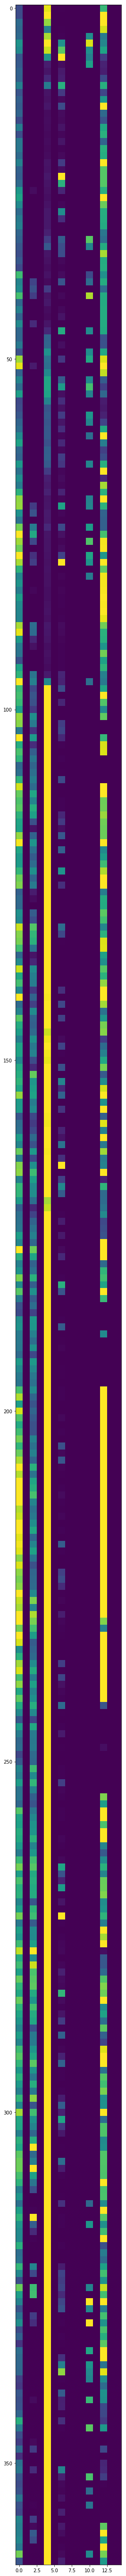

In [40]:
plt.figure(figsize=(10,100))
plt.imshow((daily_data_PSTexas_SD.reshape(-1,365,15)[30]*512).astype(int))
plt.show()

In [13]:
epoch = 2000
learning_rate = 0.01
batch_size = 20
training_data=input_fn((annual_data_PSTexas_SD,daily_data_PSTexas_SD),batch_size)
C_gen=C_generator()
C_dis=C_discriminator_Conv()
C_gen_optimizer = tf.train.AdamOptimizer(learning_rate)
C_dis_optimizer = tf.train.AdamOptimizer(learning_rate)
C_gen_losses = []
C_dis_losses = []
C_L2_losses = []

is_training = True
for i in range(epoch):

            annual_data,daily_data = training_data.make_one_shot_iterator().get_next()

            with tf.GradientTape() as C_gen_tap, tf.GradientTape() as C_dis_tap:
                daily_gen= C_gen(annual_data+randomV(batch_size,15),is_training)
                dis_fake = C_dis(daily_gen,annual_data,is_training)
                dis_real = C_dis(daily_data,annual_data,is_training)
                
                L2_loss =tf.cast(tf.losses.mean_squared_error(daily_data,daily_gen),'float32' )
                dis_loss =( tf.losses.sigmoid_cross_entropy(multi_class_labels=tf.ones_like(dis_real),logits=dis_real)+
                        tf.losses.sigmoid_cross_entropy(multi_class_labels=tf.zeros_like(dis_fake),logits=dis_fake) )
                #DY_loss = tf.reduce_mean(tf.log(1-Dis_Y)+tf.log(Dis_Y_gen))
                gen_dis_loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=tf.ones_like(dis_fake),logits=dis_fake)
                gen_loss =( gen_dis_loss
                           +13*L2_loss)
            gen_grad = C_gen_tap.gradient(gen_loss,C_gen.variables)
            dis_grad = C_dis_tap.gradient(dis_loss,C_dis.variables)
            


            C_gen_optimizer.apply_gradients(zip(gen_grad,C_gen.variables))
            C_dis_optimizer.apply_gradients(zip(dis_grad,C_dis.variables))
            C_L2_losses.append(L2_loss)
            C_gen_losses.append(gen_dis_loss )
            C_dis_losses.append(dis_loss)
  
            if i % 10 == 0 :
                print('Epoch {:05d}: C_L2_losses: {:.5f}, C_gen_loss: {:.5f}, C_dis_loss: {:.5f}'.format(i + 1,L2_loss,gen_dis_loss,dis_loss))    

Epoch 00001: C_L2_losses: 1.01234, C_gen_loss: 0.73502, C_dis_loss: 1.74159
Epoch 00011: C_L2_losses: 2.05968, C_gen_loss: 0.71352, C_dis_loss: 1.39356
Epoch 00021: C_L2_losses: 1.46987, C_gen_loss: 0.73637, C_dis_loss: 1.28798
Epoch 00031: C_L2_losses: 1.97868, C_gen_loss: 0.64918, C_dis_loss: 1.42713
Epoch 00041: C_L2_losses: 0.62109, C_gen_loss: 0.74788, C_dis_loss: 1.31786
Epoch 00051: C_L2_losses: 0.84802, C_gen_loss: 0.76408, C_dis_loss: 1.19564
Epoch 00061: C_L2_losses: 0.84024, C_gen_loss: 0.73365, C_dis_loss: 1.30445
Epoch 00071: C_L2_losses: 2.17292, C_gen_loss: 0.64502, C_dis_loss: 1.30908
Epoch 00081: C_L2_losses: 1.62497, C_gen_loss: 0.82976, C_dis_loss: 1.36357
Epoch 00091: C_L2_losses: 1.68695, C_gen_loss: 0.84730, C_dis_loss: 1.18043
Epoch 00101: C_L2_losses: 1.13567, C_gen_loss: 0.75124, C_dis_loss: 1.26842
Epoch 00111: C_L2_losses: 1.29543, C_gen_loss: 1.00905, C_dis_loss: 1.05913
Epoch 00121: C_L2_losses: 0.92678, C_gen_loss: 0.74102, C_dis_loss: 1.36370
Epoch 00131:

Epoch 01081: C_L2_losses: 0.79796, C_gen_loss: 4.62895, C_dis_loss: 0.05082
Epoch 01091: C_L2_losses: 1.34198, C_gen_loss: 0.67867, C_dis_loss: 1.89611
Epoch 01101: C_L2_losses: 0.57819, C_gen_loss: 0.51798, C_dis_loss: 1.28341
Epoch 01111: C_L2_losses: 0.57764, C_gen_loss: 0.52268, C_dis_loss: 1.65364
Epoch 01121: C_L2_losses: 0.54585, C_gen_loss: 0.94349, C_dis_loss: 1.05441
Epoch 01131: C_L2_losses: 0.78447, C_gen_loss: 0.35988, C_dis_loss: 1.84915
Epoch 01141: C_L2_losses: 0.95695, C_gen_loss: 0.60512, C_dis_loss: 2.23047
Epoch 01151: C_L2_losses: 1.19832, C_gen_loss: 0.77421, C_dis_loss: 1.36385
Epoch 01161: C_L2_losses: 0.54445, C_gen_loss: 0.50091, C_dis_loss: 2.00480
Epoch 01171: C_L2_losses: 0.74831, C_gen_loss: 2.08554, C_dis_loss: 0.57311
Epoch 01181: C_L2_losses: 0.90176, C_gen_loss: 0.79119, C_dis_loss: 0.90471
Epoch 01191: C_L2_losses: 0.88194, C_gen_loss: 3.46661, C_dis_loss: 0.36889
Epoch 01201: C_L2_losses: 1.10330, C_gen_loss: 3.50721, C_dis_loss: 0.07519
Epoch 01211:

# save model

### Fully connected model

In [64]:
checkpoint_C_gen = tf.train.Checkpoint(C_gen=C_gen)
checkpoint_C_dis=tf.train.Checkpoint(C_dis=C_dis)


In [65]:
checkpoint_C_gen.save('./Model/C_gen')
checkpoint_C_dis.save('./Model/C_dis')

'./Model/C_dis-1'

In [66]:
np.save('./Loss/C_gen_losses.npy',np.array(C_gen_losses))
np.save('./Loss/C_dis_losses.npy',np.array(C_dis_losses))

### Convolutional model

In [14]:
checkpoint_C_gen = tf.train.Checkpoint(C_gen=C_gen)
checkpoint_C_dis=tf.train.Checkpoint(C_dis=C_dis)

In [15]:
checkpoint_C_gen.save('./Model/C_gen_conv')
checkpoint_C_dis.save('./Model/C_dis_conv')

'./Model/C_dis_conv-1'

In [16]:
np.save('./Loss/C_gen_dis_conv_losses.npy',np.array(C_gen_losses))
np.save('./Loss/C_dis_conv_losses.npy',np.array(C_dis_losses))
np.save('./Loss/C_L2_conv_losses',np.array(C_L2_losses))

# restore model

In [ ]:
C_gen=C_generator()
C_dis=C_discriminator()

checkpoint_C_gen = tf.train.Checkpoint(C_gen=C_gen)
checkpoint_C_dis=tf.train.Checkpoint(C_dis=C_dis)

In [ ]:
checkpoint_C_gen.restore('./Model/C_gen')
checkpoint_C_dis.restore('./Model/C_dis')